In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr, ttest_ind, ttest_rel
import pandas as pd
import os


Index(['Region', 'DOF', 'Tau2', 'Tau2SE', 'I2', 'H2', 'Qdf', 'Q', 'Qp',
       'estimate', 'se', 'zval', 'pval', 'ci.lb', 'ci.ub'],
      dtype='object')
Asy_L_SurfArea_asy.csv
0.05 63 0.9
Effect size: 0.41808081368876143 0.4214738957933708 0.00122992827650283 1.76176299875005
count    70.000000
mean      0.418081
std       0.421474
min       0.001230
25%       0.134768
50%       0.301917
75%       0.507302
max       1.761763
Name: estimate, dtype: float64


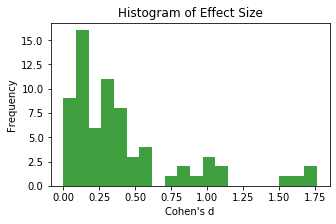

In [15]:
# An exploration of an example meta data
excl_dataset = 'NUIG'
meta_f = u'./meta/sum_asy_meta_excl_'+excl_dataset+'.csv'
meta_dat = pd.read_csv(meta_f)
print(meta_dat.columns)

csv_list =  meta_dat[u'Region']
print(csv_list[0])
pthr_list = [0.05]
for pthr in pthr_list:
    print(pthr, np.sum(meta_dat[u'pval']<=pthr),\
    1.0*np.sum(meta_dat[u'pval']<=pthr)/meta_dat[u'pval'].count())
print('Effect size:', meta_dat[u'estimate'].abs().mean(), meta_dat[u'estimate'].abs().std(),\
        meta_dat[u'estimate'].abs().min(), meta_dat[u'estimate'].abs().max())
print(meta_dat[u'estimate'].abs().describe())

plt.figure(figsize=(5,3))
plt.hist(meta_dat[u'estimate'].abs(),facecolor='g', alpha=0.75, bins=20)
plt.xlabel('Cohen\'s d')
plt.ylabel('Frequency')
plt.title('Histogram of Effect Size')
plt.show()

#meta_dat[u'estimate_abs'] = np.abs(meta_dat[u'estimate'])
#meta_dat_ordered = meta_dat.sort_values(u'estimate_abs',axis=0)
#csv_list_ordered =  meta_dat_ordered[u'Region']


ACPU
ADHD-DUB1
ADHD WUE
ADHD_Rubia1
ADHD200_KKI
ADHD200_NYU
ADHD200_OHSU
ADHD200_Peking
ADHDKonrad
Bergen_adultADHD
Bergen_SVG
CAPS_UZH
DAT_london
Dundee
Hartford_Olin
IMpACT_NL
MGH_ADHD
MTA
NeuroImage_ADAM
NeuroImage_NIJM
NICAP
NICHE
NIH
NYU ADHD
OHSU
UAB-ADHD
UCHZ
HUBIN_KASP
TOP15T
TOP3T_0
TOP3T_GE750
Anna
AnneU
BIG
BILGIN
CAMH_ASD
Christoph
ClarissaBr
Colm_UCSF
ClinG_sample
HMS_sample
EstherCOBRE
EstherMCIC
FIDMAG
GEB
GloriaBPSydney
JPCapeTown
Malt
MatthewSacchet
MDD_Ilya
MichelleLBC
ASY_results_FOR2107
ASY_results_MuensterCohort
NESDA
NeuroIMAGE
NicolaMAS
NicolaOATS
NORM_Moscow
NUIG
01_Cheng_1.5T
01_Cheng_3T
02_Heuvel_1.5T
02_Heuvel_3T
03_Huyser
04_Mataix_Cols
OXUK
GRADUAL
OLDERS
QTIM
Quinn
SaoPaulo1
SaoPaulo3
SaudEPIGEN
SHIP-2
SHIP-TREND-0
StenerEOP
UMCG_sample_groenewold
1.5T_Adults_Lateralization
3T_Adults_Lateralization
3T_Child_Adolescent_Lateralization
Cousijn
DStein
EStein
Foxe
Garavan
London
Luijten
Momenan
Orr
Ozlem
Paulus
Schmaal
Sinha
Sjoerds
VanHolst
Yucel
Kwon_3T
KwonN

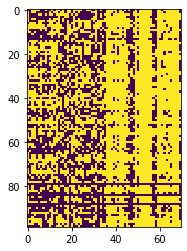

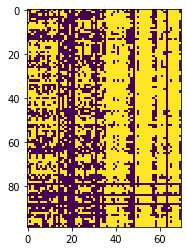

In [61]:
# construct the matrix for result consistency between single dataset and the meta results with all the other datasets.
dataset_info_file = '../../../../doc/dataset_info.csv'
dataset_info = pd.read_csv(dataset_info_file)

pthr = 0.05

dataset_by_region_mat = np.zeros((len(dataset_info['Dataset']),70)) 
# 1 for the same results (sig. & same direction, or all not sig.), otherwise 0 

dataset_by_region_mat2 = np.zeros((len(dataset_info['Dataset']),70)) 
# 1 for the same results (sig. & same direction), otherwise 0 

for j, dataset in enumerate(dataset_info['Dataset']):
    print(dataset)
    # read the meta results while excluding that dataset
    meta_f = u'./meta/sum_asy_meta_excl_'+dataset+'.csv'
    meta_dat = pd.read_csv(meta_f)
    meta_dat[u'estimate_abs'] = np.abs(meta_dat[u'estimate'])
    
    csv_list =  meta_dat[u'Region']
    for i, csv_f in enumerate(csv_list):
        meta_z = meta_dat[u'zval'][i] # meta effect for that region
        meta_p = meta_dat[u'pval'][i] # meta effect for that region
        csv_dat = pd.read_csv(os.path.join('../../../../out/',csv_f))
        
        csv_dat = csv_dat[csv_dat['Dataset']==dataset]
        #print(meta_p, meta_z, csv_dat[u'p'].values[0], csv_dat[u't'].values[0])
        if (meta_p <=pthr) and (csv_dat[u'p'].values[0]<=pthr) and ((csv_dat[u't'].values[0]*meta_z)>0)==True: 
            # significant & same direction
            dataset_by_region_mat[j,i] = 1
        elif (meta_p >pthr) and (csv_dat[u'p'].values[0]>pthr): # both not sig.
            dataset_by_region_mat[j,i] = 1
        else: # meta_p > pthr for ~false positive
            dataset_by_region_mat[j,i] = 0 
            
        if (meta_p <=pthr) and (csv_dat[u'p'].values[0]<=pthr) and ((csv_dat[u't'].values[0]*meta_z)>0)==True: 
            # significant & same direction
            dataset_by_region_mat2[j,i] = 1            
        else: # meta_p > pthr for ~false positive
            dataset_by_region_mat2[j,i] = 0

plt.imshow(dataset_by_region_mat)
plt.show()

plt.imshow(dataset_by_region_mat2)
plt.show()


In [140]:
# characterize the reproducibility
print('Ovall mean and sd, across 70 region effects\n', 
      dataset_by_region_mat.mean(axis=0).mean(), 
      dataset_by_region_mat.mean(axis=0).std())
print('Max, and min:\n',
      dataset_by_region_mat.mean(axis=0).min(), 
      dataset_by_region_mat.mean(axis=0).max())

print('1.5T:', dataset_by_region_mat[dataset_info['ScannerField_raw']==1.5,:].mean(axis=0).mean())
print('3T:', dataset_by_region_mat[dataset_info['ScannerField_raw']==3,:].mean(axis=0).mean())
print('T-test:', ttest_ind(dataset_by_region_mat[dataset_info['ScannerField_raw']==1.5,:].mean(axis=0),
               dataset_by_region_mat[dataset_info['ScannerField_raw']==3,:].mean(axis=0)))


Ovall mean and sd, across 70 region effects
 0.6318903318903318 0.22939770231362178
Max, and min:
 0.2222222222222222 0.9696969696969697
1.5T: 0.6664285714285714
3T: 0.6009118541033436
T-test: Ttest_indResult(statistic=1.5765045829923583, pvalue=0.11719923444180225)


(8, 29)


/Users/xiakon/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


(8, 15)
(8, 13)
(8, 2)
(8, 11)


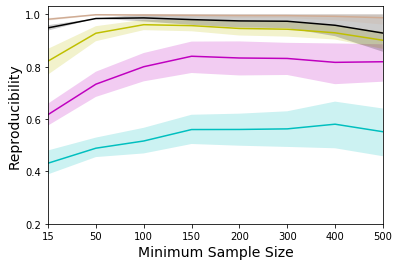

In [141]:
# check association with sample size of single dataset
N_list = [15, 50, 100, 150, 200, 300, 400, 500]
d_list = [0, 0.2, 0.4, 0.6, 0.8] # based on the overall meta with all datasets
orig_meta_f = u'../../../../meta/sum_asy_meta.csv'
orig_meta_dat = pd.read_csv(orig_meta_f)
orig_meta_dat[u'estimate_abs'] = np.abs(orig_meta_dat[u'estimate'])

irr_n_mat = np.zeros((len(d_list),len(N_list))) # intrinsic reproducibility

color_list = ['c', 'm', 'y', 'k', 'pink']

for j, ef in enumerate(d_list):
    if ef<d_list[-1]:
        ef_index = (orig_meta_dat[u'estimate_abs']>ef) & (orig_meta_dat[u'estimate_abs']<d_list[j+1])
    else:
        ef_index = orig_meta_dat[u'estimate_abs']>ef
    ef_sz_tmp = []
    for i,sz in enumerate(N_list):
        if sz<N_list[-1]:
            #sz_index = (dataset_info[u'N']>=sz) & (dataset_info[u'N']<N_list[i+1])
            sz_index = (dataset_info[u'N']>=sz)
        else:
            sz_index = dataset_info[u'N']>=sz
            
        tmp = dataset_by_region_mat[sz_index,:][:,ef_index]
        #print(tmp.mean(axis=0).shape)
        ef_sz_tmp.append(tmp.mean(axis=0))
        irr_n_mat[j,i] = tmp.mean(axis=0).mean()
    
    ef_sz_tmp = np.array(ef_sz_tmp)
    print(ef_sz_tmp.shape)
    sns.tsplot(data=ef_sz_tmp.T, ci=[95], color=color_list[j])    
    plt.xticks(range(len(N_list)), ['15','50','100','150','200','300','400','500'])
    plt.xlabel("Minimum Sample Size", fontsize=14)
    plt.ylabel("Reproducibility", fontsize=14)
    plt.yticks((0.2, 0.4, 0.6, 0.8, 1.0))

#plt.show()
plt.savefig('Fig_new_effect_size.tif',dpi=600,bbox_inches='tight')
#plt.imshow(irr_n_mat)
#plt.show()
